<a href="https://colab.research.google.com/github/lucasferreira2108/smartgrid/blob/main/reconhecimento_padroes_atividade_03_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Clustering

<br>

<div class="exercise"><b>Questão:</b> Por quê o clustering é importante?</div>
Clustering é importante porque permite descobrir ou encontrar padrões e/ou estruturas que estão ocultas em um grende volume de dados sem a necessidade de ser necessariamente supervionado. É umas das principasi tecnicas de aprendizado não supervionado e possui várias aplicações práticas. Ou seja, ajuda compreender melhor os dados, identificar padrões ocultos e tomar decisões mais informadas, mesmo quando não há informações rotuladas disponíveis.

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

%matplotlib inline

In [59]:
# Carrega dados e apresenta algumas estatícticas
multishapes = pd.read_csv("/content/multishapes.csv")
ms_df = multishapes[['x','y']]
ms_df.describe()

,x,y
count,1100.000000,1100.000000
mean,-0.081222,-0.625431
std,0.644967,1.176170
min,-1.489180,-3.353462
25%,-0.478839,-1.126752
50%,-0.132920,-0.297040
75%,0.366072,0.250817
max,1.492208,1.253874


In [60]:
# Normalizar os dados
scaled_df = pd.DataFrame(preprocessing.scale(ms_df), index=multishapes['shape'], columns = ms_df.columns)
scaled_df.describe()

,x,y
count,1.100000e+03,1100.000000
mean,4.521636e-17,0.000000
std,1.000455e+00,1.000455
min,-2.183985e+00,-2.320473
25%,-6.167723e-01,-0.426425
50%,-8.019252e-02,0.279331
75%,6.938298e-01,0.745340
max,2.440659e+00,1.598544


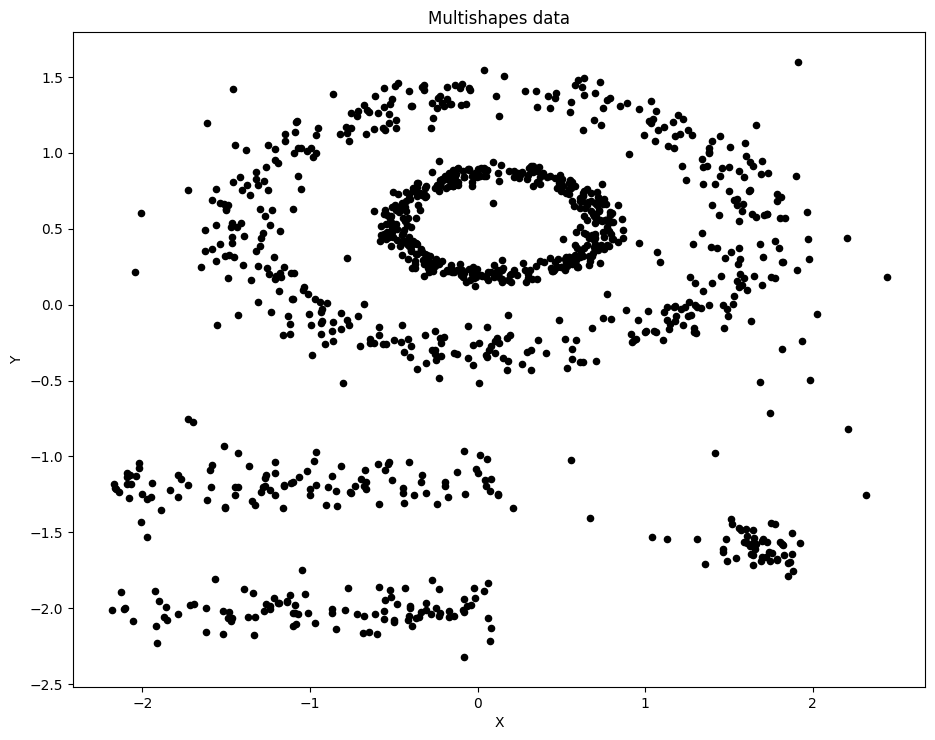

In [61]:
# Plotar os dados
msplot = scaled_df.plot.scatter(x='x',y='y',c='Black',title="Multishapes data",figsize=(11,8.5))
msplot.set_xlabel("X")
msplot.set_ylabel("Y")
plt.show()

## k-Means clustering:

<br>

<div class="exercise"  style="background-color:#b3e6ff"><b>Questão</b>: Como o k-Means funciona? </div>
Sendo um dos algoritmos de clustering mais simples e populares, o k-Means agrupa um conjunto de dados em k grupos, ou clusters, e cada grupo é formado por pontos que estão mais próximos de um centro comum (centróide).

In [62]:
from sklearn.cluster import KMeans
ms_kmeans = KMeans(n_clusters=3, init='random', n_init=3, random_state=109).fit(scaled_df)

### Plotting

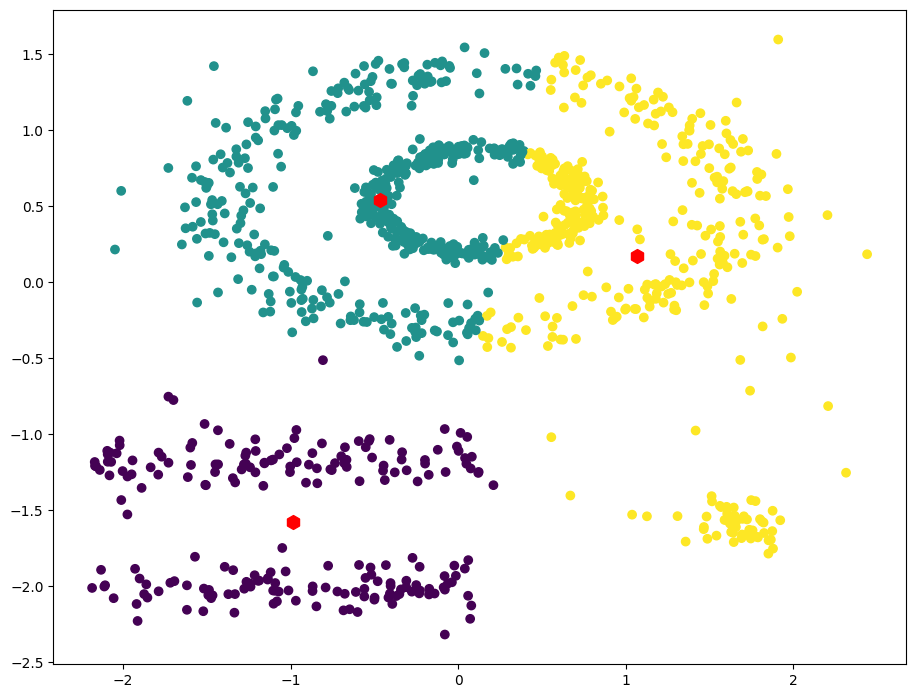

In [63]:
plt.figure(figsize=(11,8.5))
plt.scatter(scaled_df['x'],scaled_df['y'], c=ms_kmeans.labels_);
plt.scatter(ms_kmeans.cluster_centers_[:,0],ms_kmeans.cluster_centers_[:,1], c='r', marker='h', s=100);

<div class="exercise"><b>Questão</b>: Esse resultado era esperado ou alguma coisa deu errado? Nós devemos sempre normalizar os dados antes de agrupar?</div>
Este resultado era o esperado utlizando o k-Means pois existem 3 grupos de dados bem definidos, com seus centroides. Sendo um grupo linear, que está bem definido e se entende seus dados, e outros dois de formato que não é possível ter uma correta imterpretação dos dados pois os dados não permitem que o k-Means faça uma projeção circular bem definida, gerando agrupamentos "confusos" de formatos semi-circulares. É muito importante tratar/nomralizar os dados para que fiquem mais "fáceis" para trabalhar com clusters, uma vez que a maioria destes algoritmos depende de medidas de distância entre os pontos.

### Características:
 - Problema de inicialização; deve ser rodado várias vezes
 - A distância total ao quadrado nunca deve piorar durante uma atualização
 - k-Means pode lutar com clusters que estão próximos; eles podem ser agrupados em um
 - Não há noção de 'não faz parte de nenhum cluster' ou 'parte de dois clusters'
 - [Visualização aqui](http://web.stanford.edu/class/ee103/visualizations/kmeans/kmeans.html)

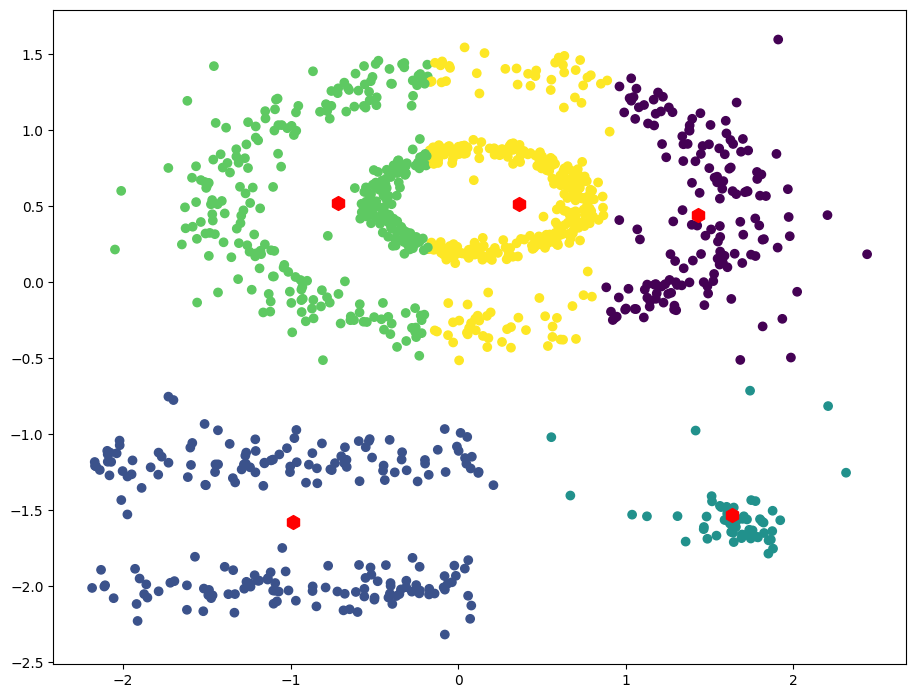

In [64]:
from sklearn.cluster import KMeans
ms_kmeans = KMeans(n_clusters=5, init='random', n_init=3, random_state=109).fit(scaled_df)
plt.figure(figsize=(11,8.5))
plt.scatter(scaled_df['x'],scaled_df['y'], c=ms_kmeans.labels_);
plt.scatter(ms_kmeans.cluster_centers_[:,0],ms_kmeans.cluster_centers_[:,1], c='r', marker='h', s=100);

## Agglomerative Clustering

<br>

<div class="exercise"  style="background-color:#b3e6ff"><b>Questão</b>: Como o algoritmo Hierarchical Agglomerative Clustering funciona? </div>
É um tipo de algoritmo de agrupamento que funciona como se estivesse juntando os pontos aos poucos. Ele monta uma espécie de "árvore de decisões" chamada dendrograma, e começa considerando que cada ponto é seu próprio grupo. Depois, vai unindo os grupos mais próximos, passo a passo, até que todos formem um só grupo grande.
É importante ressaltar que ele pode usar diferentes formas de medir a “proximidade” entre os grupos o que pode influenciar no resutlado final.

In [65]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=5, linkage='ward', metric='euclidean').fit(scaled_df)

## Plotting

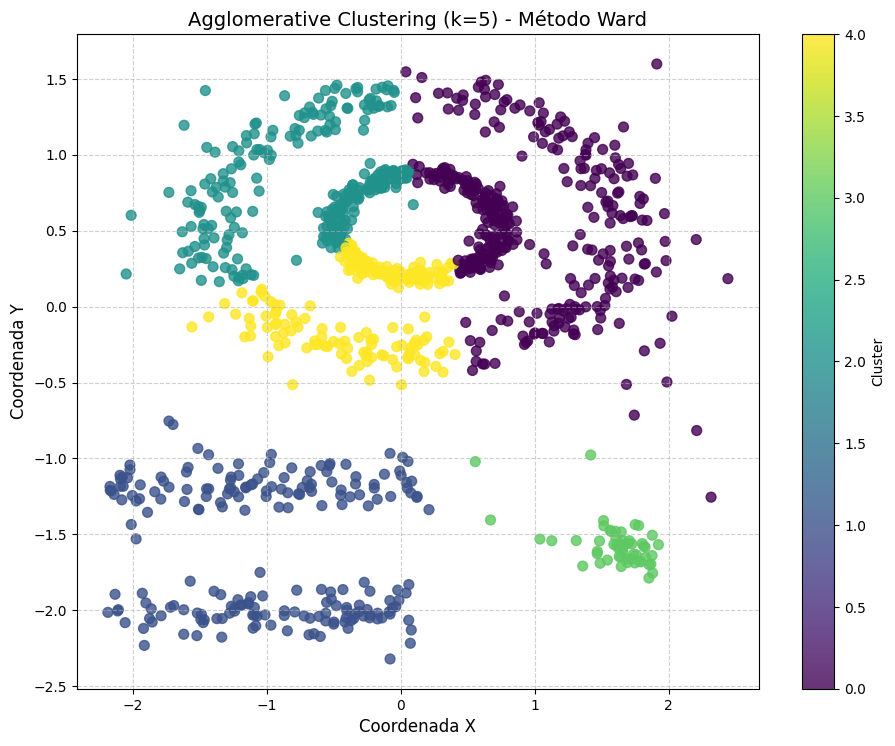

In [66]:
# Inserir o código para plotar os clusterings aqui
plt.figure(figsize=(11,8.5))
plt.scatter(
    scaled_df['x'],
    scaled_df['y'],
    c=clustering.labels_,    # Cores baseadas nos rótulos dos clusters
    cmap='viridis',          # Mapa de cores (opcional)
    s=50,                    # Tamanho dos pontos
    alpha=0.8                # Transparência para melhor visualização
)

# Adicionar título e labels
plt.title("Agglomerative Clustering (k=5) - Método Ward", fontsize=14)
plt.xlabel("Coordenada X", fontsize=12)
plt.ylabel("Coordenada Y", fontsize=12)
plt.colorbar(label="Cluster")  # Barra de cores para identificar os grupos

plt.grid(True, linestyle='--', alpha=0.6)  # Grade opcional
plt.show()

### Características:
 - É custoso: complexidade de tempo O(n^3) e complexidade de espaço O(n^2).
 - Muitas opções de critérios de ligação (linkage)
 - Cada nó é agrupado (nenhum filho é deixado para trás)

## DBscan Clustering


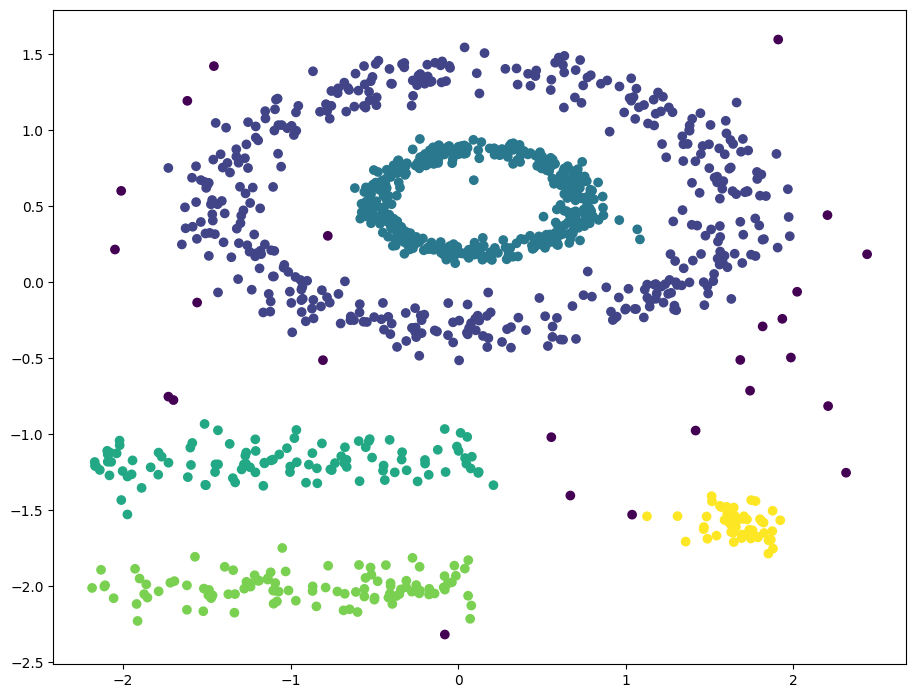

In [67]:
from sklearn.cluster import DBSCAN
plt.figure(figsize=(11,8.5))
fitted_dbscan = DBSCAN(eps=0.2).fit(scaled_df)
plt.scatter(scaled_df['x'],scaled_df['y'], c=fitted_dbscan.labels_);

<div class="exercise"><b>Exercício</b>: Altere os valores de epsilon e do min_samples e plote os resutados.</div>

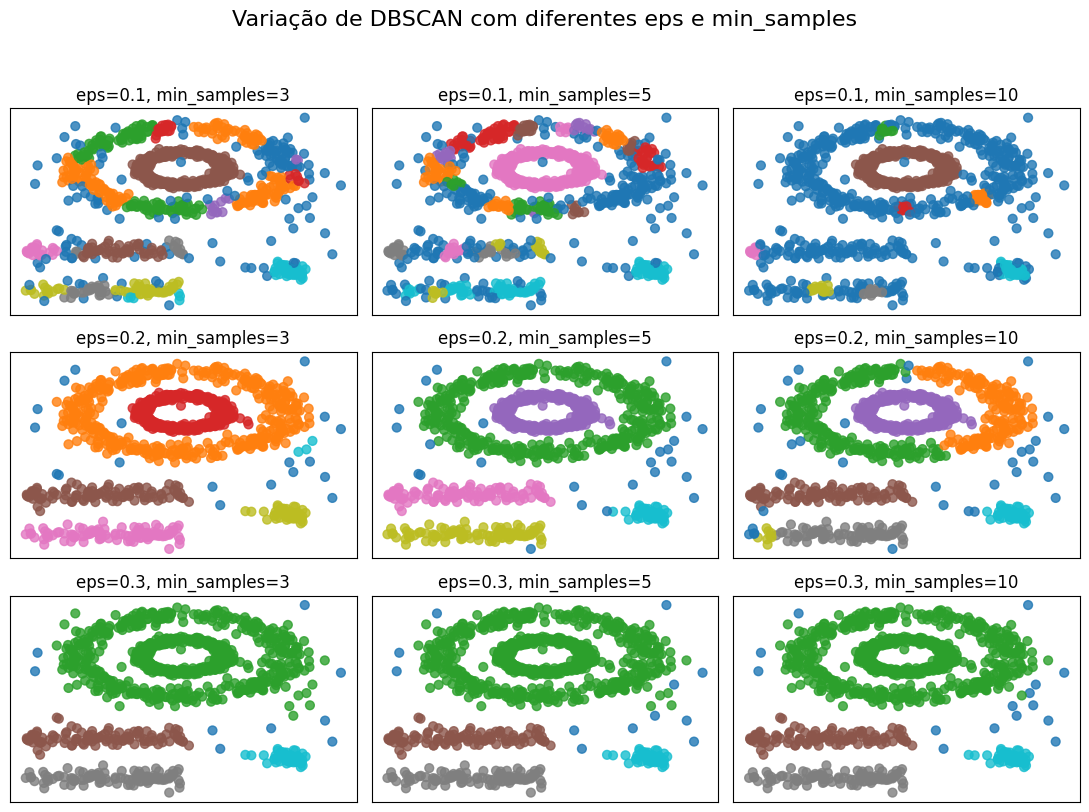

In [68]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Lista de valores para testar
eps_values = [0.1, 0.2, 0.3]
min_samples_values = [3, 5, 10]

# Criar um grid de subplots
fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(11,8.5))
fig.suptitle("Variação de DBSCAN com diferentes eps e min_samples", fontsize=16)

# Iterar sobre os valores e gerar os plots
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_df)

        ax = axes[i, j]
        scatter = ax.scatter(
            scaled_df['x'], scaled_df['y'],
            c=labels,
            cmap='tab10',
            s=40,
            alpha=0.8
        )

        ax.set_title(f"eps={eps}, min_samples={min_samples}")
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Características:
 - Pode agrupar relacionamentos não lineares muito bem; potencial para agrupamentos mais naturais e de formato arbitrário
 - Não requer a especificação do número de clusters (ou seja, ** k **); o algoritmo determina tal
 - Robusto para outliers
 - Muito sensível aos parâmetros (requer forte conhecimento dos dados)
 - Não garante que todos (ou QUALQUER) item será agrupado

<br>

<div class="discussion"><b>Discussão</b>: </div>Quando devemos preferir um tipo de cluster a outro? Devemos sempre tentar todos eles? Imagine que você trabalha no Spotify e deseja criar playlists personalizadas para cada pessoa. Pode-se imaginar que existe um conjunto de dados em que cada linha é uma música específica e as colunas são características (por exemplo, tempo (BPM), frequência vocal média, quantidade de baixo, sentimento das letras, duração em segundos, etc). Vamos usar o agrupamento para agrupar o catálogo de músicas favoritas de alguém, que servirá como pontos de partida separados para sugerir músicas futuras. Especificamente, imagine que você 'gostou' de 500 músicas no Spotify até agora, e seu algoritmo de recomendação precisa agrupar essas 500 músicas. Você primeiro experimentaria com k-Means, aglomerativo ou DBScan? Por quê?

Após pesquisar um pouco mais sobre o funcionamento, vantagens e desvantagens dos tres metodos apresentados, posso dizer que inicialmente utilizaria o k-Means. Isso porque é o mais simples e se mostra eficiente, tem maior adaptação parao tipo de dados que iremos tratar, no caso as músicas, pois possuem atributos bem definidos o que facilita na criação dos grupos (clusters). E é o mais fácil de interpretar e entender os resultados.